<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MARKET BASKET ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/Market_Basket_Optimisation.csv')
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

shrimp                object
almonds               object
avocado               object
vegetables mix        object
green grapes          object
whole weat flour      object
yams                  object
cottage cheese        object
energy drink          object
tomato juice          object
low fat yogurt        object
green tea             object
honey                 object
salad                 object
mineral water         object
salmon                object
antioxydant juice     object
frozen smoothie       object
spinach               object
olive oil            float64
dtype: object

In [ ]:
df.shape[1]

20

In [ ]:
df = df.astype('str')

In [ ]:
#let us first get all the transactions
transactions = []
for i in range(7500):
  for j in range(20):
    if df.values[i,j]=='nan':
      transactions.append('0')
      break
    else:
      transactions.append(df.values[i,j])

In [ ]:
sublist = []
trans = []
for x in transactions:
  if x == '0':
    trans.append(sublist)
    sublist = []
  else:
    sublist.append(x)
if sublist:
  trans.append(sublist)

In [ ]:
len(trans)

7500

In [ ]:
c = 0
for x in trans:
  if len(x) > c:
    c = len(x)
    p = x
print(p,'\n',c)

['fresh tuna', 'frozen vegetables', 'parmesan cheese', 'pepper', 'spaghetti', 'milk', 'olive oil', 'black tea', 'almonds', 'salmon', 'honey', 'cake', 'gums', 'oil', 'cereals', 'chocolate', 'frozen smoothie', 'protein bar', 'mayonnaise'] 
 19


In [ ]:
flat = [x for _ in trans for x in _]
len(flat)

29343

In [ ]:
items = list(set(x for _ in trans for x in _))
items.sort()
print(len(items))

120


In [ ]:
mydf = pd.DataFrame(0, index=range(7500), columns = items)
mydf

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
c = -1
for x in trans:
  c+=1
  for y in x:
      mydf.at[c,y] = 1

In [ ]:
mydf

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**APRIORI**

In [ ]:
#the minimum support is kept at 0.01 because
#there is a large number of unique items.
frequent_itemset = apriori(mydf,min_support=0.01,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)
...,...,...
254,0.011067,"(ground beef, milk, mineral water)"
255,0.017067,"(spaghetti, ground beef, mineral water)"
256,0.015733,"(spaghetti, milk, mineral water)"
257,0.010267,"(spaghetti, olive oil, mineral water)"


In [ ]:
rulea = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rulea

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
1,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,0.003556,1.015680,0.407144
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068,0.420154
3,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185,0.417349
4,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,0.002777,1.018920,0.194639
...,...,...,...,...,...,...,...,...,...,...
403,"(spaghetti, mineral water)",(pancakes),0.059733,0.095067,0.011467,0.191964,2.019260,0.005788,1.119917,0.536836
404,"(pancakes, mineral water)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,0.005593,1.251163,0.504751
405,(spaghetti),"(pancakes, mineral water)",0.174133,0.033733,0.011467,0.065850,1.952073,0.005593,1.034381,0.590560
406,(pancakes),"(spaghetti, mineral water)",0.095067,0.059733,0.011467,0.120617,2.019260,0.005788,1.069235,0.557797


**FP-GROWTH**

In [ ]:
freq_itemset = fpgrowth(mydf, min_support=0.01, use_colnames=True)
freq_itemset

,support,itemsets
0,0.179733,(eggs)
1,0.087200,(burgers)
2,0.020933,(meatballs)
3,0.062533,(turkey)
4,0.033200,(avocado)
...,...,...
254,0.014133,"(olive oil, ground beef)"
255,0.011333,"(olive oil, frozen vegetables)"
256,0.012000,"(olive oil, eggs)"
257,0.010800,"(olive oil, pancakes)"


In [ ]:
rulep = association_rules(freq_itemset, metric='lift', min_threshold=0.5)
rulep

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
1,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004
2,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,0.013127,1.086974,0.555682
3,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
4,(mineral water),(burgers),0.238267,0.087200,0.024400,0.102406,1.174384,0.003623,1.016941,0.194936
...,...,...,...,...,...,...,...,...,...,...
431,"(spaghetti, mineral water)",(olive oil),0.059733,0.065733,0.010267,0.171875,2.614731,0.006340,1.128171,0.656783
432,"(olive oil, mineral water)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,0.005484,1.318826,0.549222
433,(spaghetti),"(olive oil, mineral water)",0.174133,0.027467,0.010267,0.058959,2.146553,0.005484,1.033465,0.646759
434,(olive oil),"(spaghetti, mineral water)",0.065733,0.059733,0.010267,0.156187,2.614731,0.006340,1.114306,0.661001


In [ ]:
best_choices=rulea.sort_values(by='lift',ascending=False)
print('Best Choices are...')
print(best_choices[['antecedents','consequents','lift']])

Best Choices are...
                    antecedents                 consequents      lift
217             (herb & pepper)               (ground beef)  3.291555
216               (ground beef)             (herb & pepper)  3.291555
385  (spaghetti, mineral water)               (ground beef)  2.907540
388               (ground beef)  (spaghetti, mineral water)  2.907540
397  (spaghetti, mineral water)                 (olive oil)  2.614731
..                          ...                         ...       ...
155              (french fries)            (low fat yogurt)  1.020983
130                 (olive oil)                      (eggs)  1.015704
131                      (eggs)                 (olive oil)  1.015704
145                 (spaghetti)                  (escalope)  1.013422
144                  (escalope)                 (spaghetti)  1.013422

[408 rows x 3 columns]


In [ ]:
print('Top 10 best choices are...')
print(best_choices[['antecedents', 'consequents']][:20:2])

Top 10 best choices are...
                      antecedents                         consequents
217               (herb & pepper)                       (ground beef)
385    (spaghetti, mineral water)                       (ground beef)
397    (spaghetti, mineral water)                         (olive oil)
195           (frozen vegetables)                          (tomatoes)
191                      (shrimp)                 (frozen vegetables)
367         (milk, mineral water)                 (frozen vegetables)
386  (mineral water, ground beef)                         (spaghetti)
369                        (milk)  (frozen vegetables, mineral water)
380         (milk, mineral water)                       (ground beef)
254                        (milk)                              (soup)


In [ ]:
best_choices["antecedents"] = best_choices["antecedents"].apply(lambda x: list(x)).astype("unicode")
best_choices["consequents"] = best_choices["consequents"].apply(lambda x: list(x)).astype("unicode")

In [ ]:
best_ant = []
for x in best_choices['antecedents']:
  x = x.strip(("[]'"))
  best_ant.append(x)

In [ ]:
best_con = []
for x in best_choices['consequents']:
  x = x.strip(("[]'"))
  best_con.append(x)

In [ ]:
# a = rulea['lift'].sort_values(ascending=False)
# a = list(a)
# a

[3.2915549671393096,
 3.2915549671393096,
 2.907540220973057,
 2.907540220973057,
 2.614731237322515,
 2.614731237322515,
 2.4741340530814213,
 2.4741340530814213,
 2.4508202078295533,
 2.4508202078295533,
 2.4184149184149186,
 2.418414918414918,
 2.3943612791875135,
 2.3943612791875135,
 2.389672010318777,
 2.3896720103187765,
 2.346223428312981,
 2.3462234283129804,
 2.320922505619076,
 2.320922505619076,
 2.295458271847844,
 2.295458271847844,
 2.2908567284695827,
 2.2908567284695827,
 2.201000548955431,
 2.201000548955431,
 2.1880272251135984,
 2.188027225113598,
 2.15209540606366,
 2.15209540606366,
 2.1465528776817973,
 2.1465528776817973,
 2.1264689423614995,
 2.1264689423614995,
 2.1125671985297907,
 2.1125671985297907,
 2.111207203540724,
 2.1112072035407237,
 2.107267732267732,
 2.107267732267732,
 2.0956866957462097,
 2.0956866957462097,
 2.0860980415812125,
 2.086098041581212,
 2.0511017346460387,
 2.0511017346460387,
 2.0323522927689592,
 2.0323522927689592,
 2.02462224811

In [ ]:
pop_ant_choices = rulea.sort_values(by='antecedent support', ascending=False)
pop_con_choices = rulea.sort_values(by='consequent support', ascending=False)
print(pop_ant_choices[['antecedents', 'antecedent support']])
print(pop_con_choices[['consequents', 'consequent support']])

                   antecedents  antecedent support
407            (mineral water)            0.238267
267            (mineral water)            0.238267
38             (mineral water)            0.238267
313            (mineral water)            0.238267
45             (mineral water)            0.238267
..                         ...                 ...
366  (milk, frozen vegetables)            0.023600
320   (ground beef, chocolate)            0.023067
396     (spaghetti, olive oil)            0.022933
378        (milk, ground beef)            0.022000
344        (eggs, ground beef)            0.020000

[408 rows x 2 columns]
                   consequents  consequent support
0              (mineral water)            0.238267
272            (mineral water)            0.238267
39             (mineral water)            0.238267
338            (mineral water)            0.238267
44             (mineral water)            0.238267
..                         ...                 ...
371  (m

In [ ]:
pop_ant_choices["antecedents"] = pop_ant_choices["antecedents"].apply(lambda x: list(x)).astype("unicode")
pop_con_choices["consequents"] = pop_con_choices["consequents"].apply(lambda x: list(x)).astype("unicode")

In [ ]:
pop_ant_choices['antecedents']

407                ['mineral water']
267                ['mineral water']
38                 ['mineral water']
313                ['mineral water']
45                 ['mineral water']
                   ...              
366    ['milk', 'frozen vegetables']
320     ['ground beef', 'chocolate']
396       ['spaghetti', 'olive oil']
378          ['milk', 'ground beef']
344          ['eggs', 'ground beef']
Name: antecedents, Length: 408, dtype: object

In [ ]:
pop_ant = []
for x in pop_ant_choices['antecedents']:
  x = x.strip(("[]'"))
  if x not in pop_ant:
    pop_ant.append(x)
  if len(pop_ant) == 20:
    break
pop_ant

['mineral water',
 'eggs',
 'spaghetti',
 'french fries',
 'chocolate',
 'green tea',
 'milk',
 'ground beef',
 'frozen vegetables',
 'pancakes',
 'burgers',
 'cake',
 'cookies',
 'escalope',
 'low fat yogurt',
 'shrimp',
 'tomatoes',
 'olive oil',
 'frozen smoothie',
 'turkey']

In [ ]:
pop_con = []
for x in pop_con_choices['consequents']:
  x = x.strip(("[]'"))
  if x not in pop_con:
    pop_con.append(x)
  if len(pop_con) == 20:
    break
pop_con

['mineral water',
 'eggs',
 'spaghetti',
 'french fries',
 'chocolate',
 'green tea',
 'milk',
 'ground beef',
 'frozen vegetables',
 'pancakes',
 'burgers',
 'cake',
 'cookies',
 'escalope',
 'low fat yogurt',
 'shrimp',
 'tomatoes',
 'olive oil',
 'frozen smoothie',
 'turkey']

$\because$ pop_ant and pop_con is same -

In [ ]:
popular = pop_ant

In [ ]:
mydf[popular].corr()

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey
mineral water,1.000000,0.049572,0.112920,-0.043612,0.086387,-0.003591,0.119653,0.138150,0.104055,0.088688,0.030144,0.070101,-0.100914,-0.015945,0.050042,0.059009,0.075344,0.111812,0.048957,0.041691
eggs,0.049572,1.000000,0.035958,0.039279,0.026369,0.013402,0.058209,0.020457,0.040783,0.041260,0.121181,0.042904,-0.037520,-0.030762,0.030083,0.013280,-0.000280,0.001950,-0.003131,0.088498
spaghetti,0.112920,0.035958,1.000000,-0.015167,0.075979,0.027638,0.101274,0.195672,0.101159,0.077729,0.058718,0.038809,-0.058190,0.001809,0.018824,0.089939,0.094253,0.122231,0.049795,0.061471
french fries,-0.043612,0.039279,-0.015167,1.000000,0.045855,0.046852,0.012499,-0.026150,0.025065,0.035170,0.066800,0.039025,-0.004003,0.027908,0.002740,-0.022636,0.003243,-0.021825,0.040725,-0.000245
chocolate,0.086387,0.026369,0.075979,0.045855,1.000000,0.014656,0.087646,0.063203,0.067259,0.039499,0.026596,0.003127,-0.027570,0.045982,0.023194,0.066241,0.029875,0.061359,0.050817,0.012120
green tea,-0.003591,0.013402,0.027638,0.046852,0.014656,1.000000,0.004335,0.018150,0.018268,0.038791,0.062371,0.037154,0.015072,-0.016820,-0.029118,0.022008,0.037894,0.014185,0.033077,0.044076
milk,0.119653,0.058209,0.101274,0.012499,0.087646,0.004335,1.000000,0.092667,0.114005,0.042764,0.069289,0.030840,-0.065917,-0.028074,0.036972,0.096654,0.060571,0.102696,0.074348,0.039708
ground beef,0.138150,0.020457,0.195672,-0.026150,0.063203,0.018150,0.092667,1.000000,0.086539,0.059460,0.040856,0.002058,-0.043249,0.005853,0.026462,0.058173,0.066699,0.104027,0.019184,0.042388
frozen vegetables,0.104055,0.040783,0.101159,0.025065,0.067259,0.018268,0.114005,0.086539,1.000000,0.051124,0.026797,0.031668,-0.064261,0.000465,0.036532,0.130529,0.129667,0.069620,0.055626,0.039920
pancakes,0.088688,0.041260,0.077729,0.035170,0.039499,0.038791,0.042764,0.059460,0.051124,1.000000,0.027112,0.051964,-0.030636,-0.021134,0.028282,0.049700,0.045436,0.062611,0.042855,0.051470


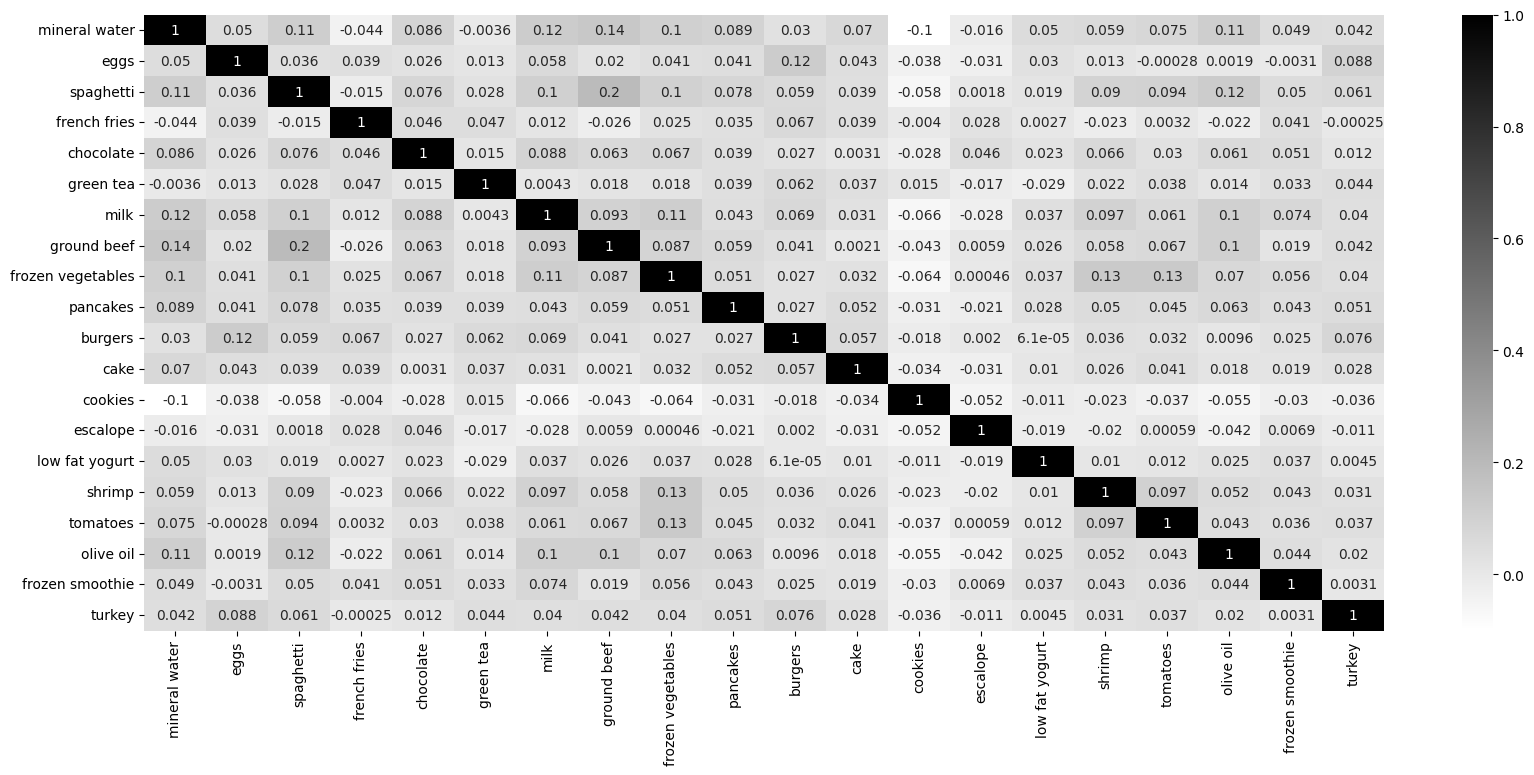

In [ ]:
pt.figure(figsize=(20,8))
sb.heatmap(mydf[popular].corr(), cmap='binary', annot=True);

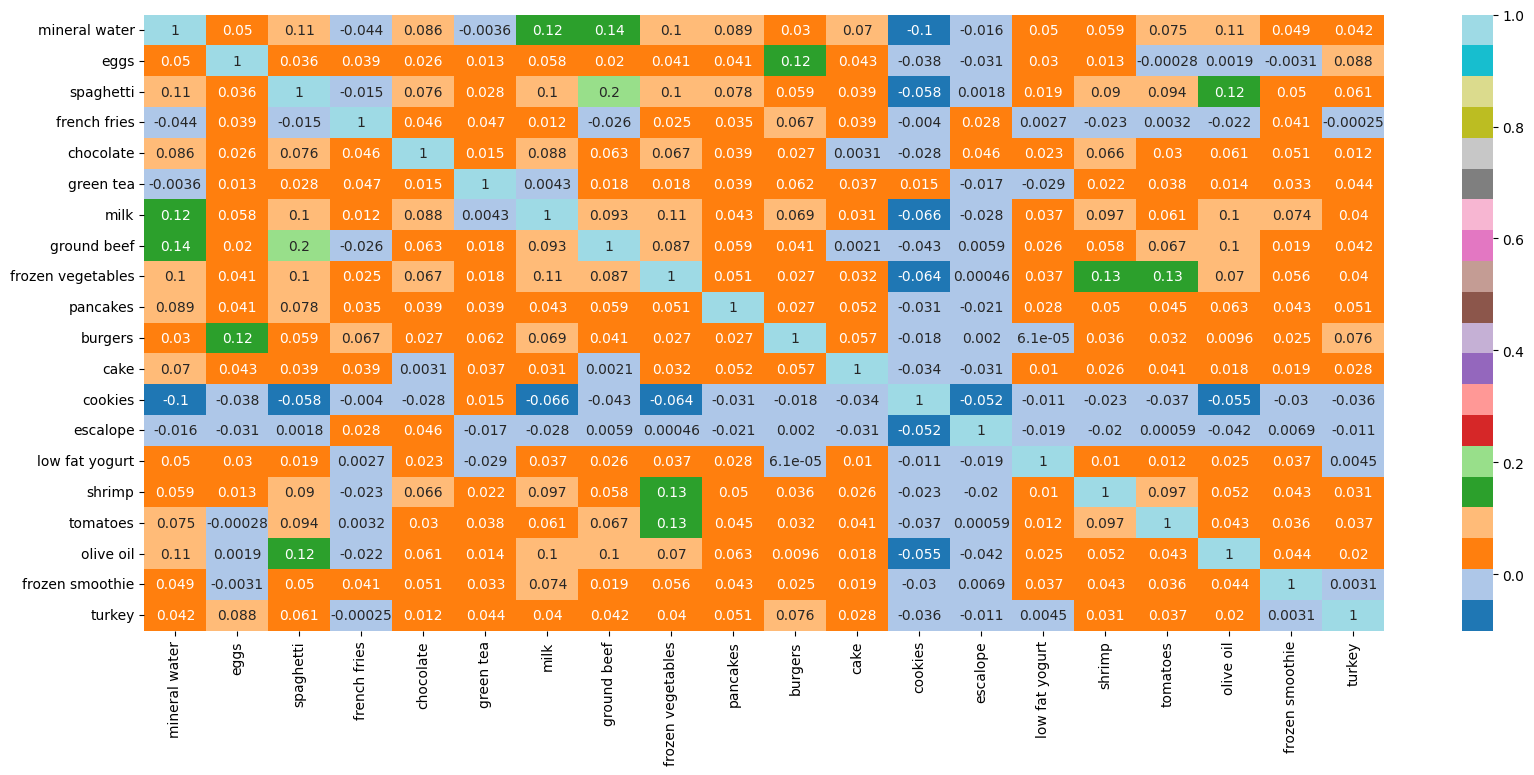

In [ ]:
pt.figure(figsize=(20,8))
sb.heatmap(mydf[popular].corr(), cmap='tab20', annot=True);

In [ ]:
def support(x, df):
  return df[x].value_counts()[1]/len(df)

In [ ]:
support('mineral water', mydf)

0.23826666666666665

In [ ]:
pop_sup = []
for x in popular:
  pop_sup.append(support(x, mydf))
pop_sup

[0.23826666666666665,
 0.17973333333333333,
 0.17413333333333333,
 0.17093333333333333,
 0.16386666666666666,
 0.132,
 0.1296,
 0.09826666666666667,
 0.09533333333333334,
 0.09506666666666666,
 0.0872,
 0.08106666666666666,
 0.0804,
 0.07933333333333334,
 0.0764,
 0.07133333333333333,
 0.0684,
 0.06573333333333334,
 0.0632,
 0.06253333333333333]

In [ ]:
pop_dic = {}
c = 0
for x in popular:
  pop_dic[x] = pop_sup[c]
  c+=1
pop_dic

{'mineral water': 0.23826666666666665,
 'eggs': 0.17973333333333333,
 'spaghetti': 0.17413333333333333,
 'french fries': 0.17093333333333333,
 'chocolate': 0.16386666666666666,
 'green tea': 0.132,
 'milk': 0.1296,
 'ground beef': 0.09826666666666667,
 'frozen vegetables': 0.09533333333333334,
 'pancakes': 0.09506666666666666,
 'burgers': 0.0872,
 'cake': 0.08106666666666666,
 'cookies': 0.0804,
 'escalope': 0.07933333333333334,
 'low fat yogurt': 0.0764,
 'shrimp': 0.07133333333333333,
 'tomatoes': 0.0684,
 'olive oil': 0.06573333333333334,
 'frozen smoothie': 0.0632,
 'turkey': 0.06253333333333333}

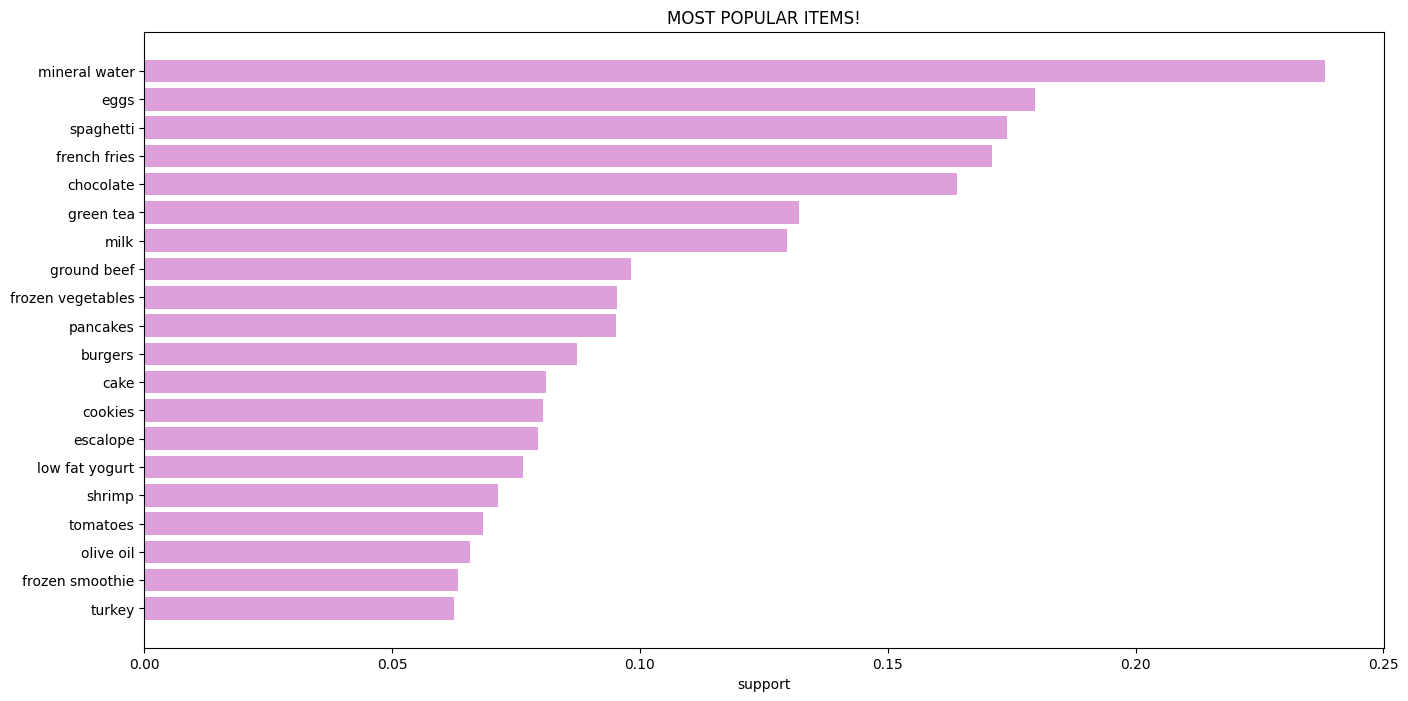

In [ ]:
pt.figure(figsize=(16,8))
pt.gca().invert_yaxis()
pt.title('MOST POPULAR ITEMS!')
pt.xlabel('support')
pt.barh(*zip(*pop_dic.items()), color='plum');

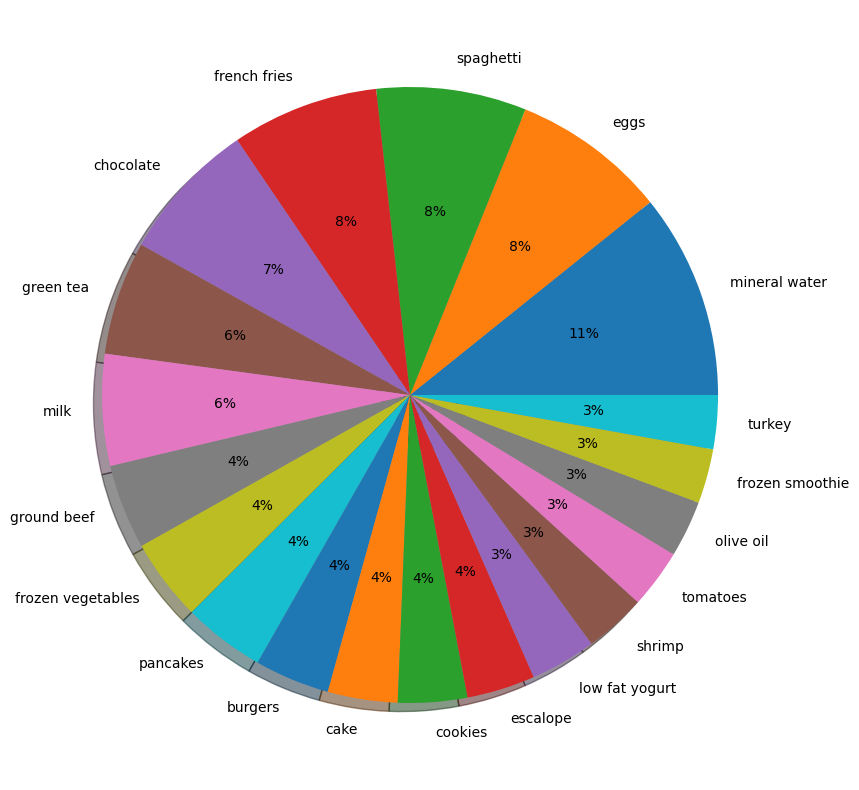

In [ ]:
pt.figure(figsize=(10,10))
pt.pie(pop_sup, labels=popular, autopct='%1.0f%%', shadow=True);

In [ ]:
a = mydf[popular[:10]].corr()
a

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes
mineral water,1.000000,0.049572,0.112920,-0.043612,0.086387,-0.003591,0.119653,0.138150,0.104055,0.088688
eggs,0.049572,1.000000,0.035958,0.039279,0.026369,0.013402,0.058209,0.020457,0.040783,0.041260
spaghetti,0.112920,0.035958,1.000000,-0.015167,0.075979,0.027638,0.101274,0.195672,0.101159,0.077729
french fries,-0.043612,0.039279,-0.015167,1.000000,0.045855,0.046852,0.012499,-0.026150,0.025065,0.035170
chocolate,0.086387,0.026369,0.075979,0.045855,1.000000,0.014656,0.087646,0.063203,0.067259,0.039499
green tea,-0.003591,0.013402,0.027638,0.046852,0.014656,1.000000,0.004335,0.018150,0.018268,0.038791
milk,0.119653,0.058209,0.101274,0.012499,0.087646,0.004335,1.000000,0.092667,0.114005,0.042764
ground beef,0.138150,0.020457,0.195672,-0.026150,0.063203,0.018150,0.092667,1.000000,0.086539,0.059460
frozen vegetables,0.104055,0.040783,0.101159,0.025065,0.067259,0.018268,0.114005,0.086539,1.000000,0.051124
pancakes,0.088688,0.041260,0.077729,0.035170,0.039499,0.038791,0.042764,0.059460,0.051124,1.000000


In [ ]:
for i in range(a.shape[0]):
  for j in range(a.shape[1]):
    if a.iloc[i,j] == 1:
      a.iloc[i,j] = '-'
    elif a.iloc[i,j] < 0:
      a.iloc[i,j] = 'LOW'
    elif a.iloc[i,j] > 0.06:
      a.iloc[i,j] = 'HIGH'
    else:
      a.iloc[i,j] = 'MED'
a

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes
mineral water,-,MED,HIGH,LOW,HIGH,LOW,HIGH,HIGH,HIGH,HIGH
eggs,MED,-,MED,MED,MED,MED,MED,MED,MED,MED
spaghetti,HIGH,MED,-,LOW,HIGH,MED,HIGH,HIGH,HIGH,HIGH
french fries,LOW,MED,LOW,-,MED,MED,MED,LOW,MED,MED
chocolate,HIGH,MED,HIGH,MED,-,MED,HIGH,HIGH,HIGH,MED
green tea,LOW,MED,MED,MED,MED,-,MED,MED,MED,MED
milk,HIGH,MED,HIGH,MED,HIGH,MED,-,HIGH,HIGH,MED
ground beef,HIGH,MED,HIGH,LOW,HIGH,MED,HIGH,-,HIGH,MED
frozen vegetables,HIGH,MED,HIGH,MED,HIGH,MED,HIGH,HIGH,-,MED
pancakes,HIGH,MED,HIGH,MED,MED,MED,MED,MED,MED,-
